# Machine Learning model for predicting life expectancy

### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset

In [5]:
dataset_path = "Life Expectancy Data.csv"
ds = pd.read_csv(dataset_path)
ds.head()

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### 2. Checking the Dataset Structure

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expect                      2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   HepatitisB                       2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

### 3. Checking for Missing Values

In [9]:
missing_values = ds.isnull().sum()
missing_values_percentage = (missing_values / len(ds)) * 100
print("Missing Values (%):\n", missing_values_percentage)

Missing Values (%):
 Country                             0.000000
Year                                0.000000
Status                              0.000000
Life_expect                         0.340368
Adult_Mortality                     0.340368
infant_deaths                       0.000000
Alcohol                             6.603131
percentage_expenditure              0.000000
HepatitisB                         18.822328
Measles                             0.000000
BMI                                 1.157250
under_five_deaths                   0.000000
Polio                               0.646698
Total_expenditure                   7.692308
Diphtheria                          0.646698
HIV_AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness_1-19_years                 1.157250
thinness_5-9_years                  1.157250
Income_composition_of_resources     5.684139
Schooling                         

### Handling Missing Data

**Fill numerical columns with their respective means**

In [12]:
numeric_cols = ds.select_dtypes(include=[np.number]).columns  # Select only numeric columns
ds[numeric_cols] = ds[numeric_cols].fillna(ds[numeric_cols].mean())

**Verify again**

In [14]:
ds.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expect                        0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

### 5. Exploratory Data Analysis (EDA)

**5.1 Distribution of Life Expectancy**

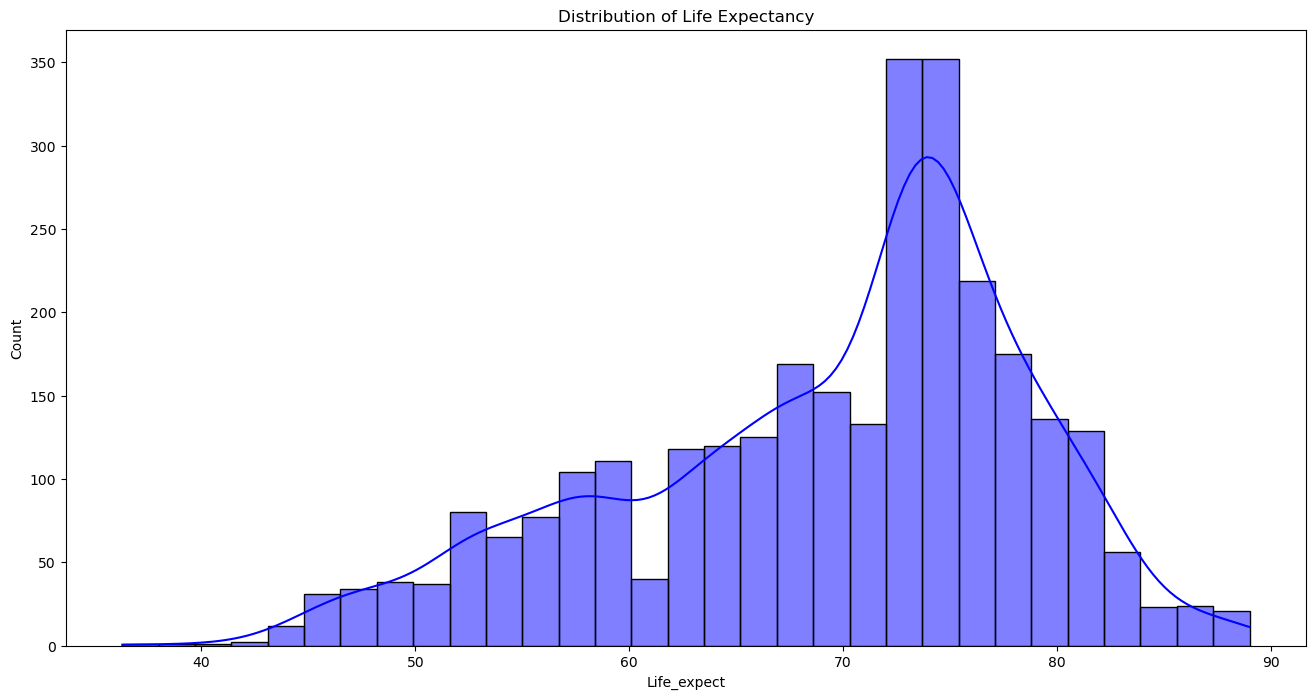

In [17]:
plt.figure(figsize=(16, 8))
sns.histplot(ds['Life_expect'], kde=True, color='b')
plt.title('Distribution of Life Expectancy')
plt.show()

**5.2 Correlation Heatmap**

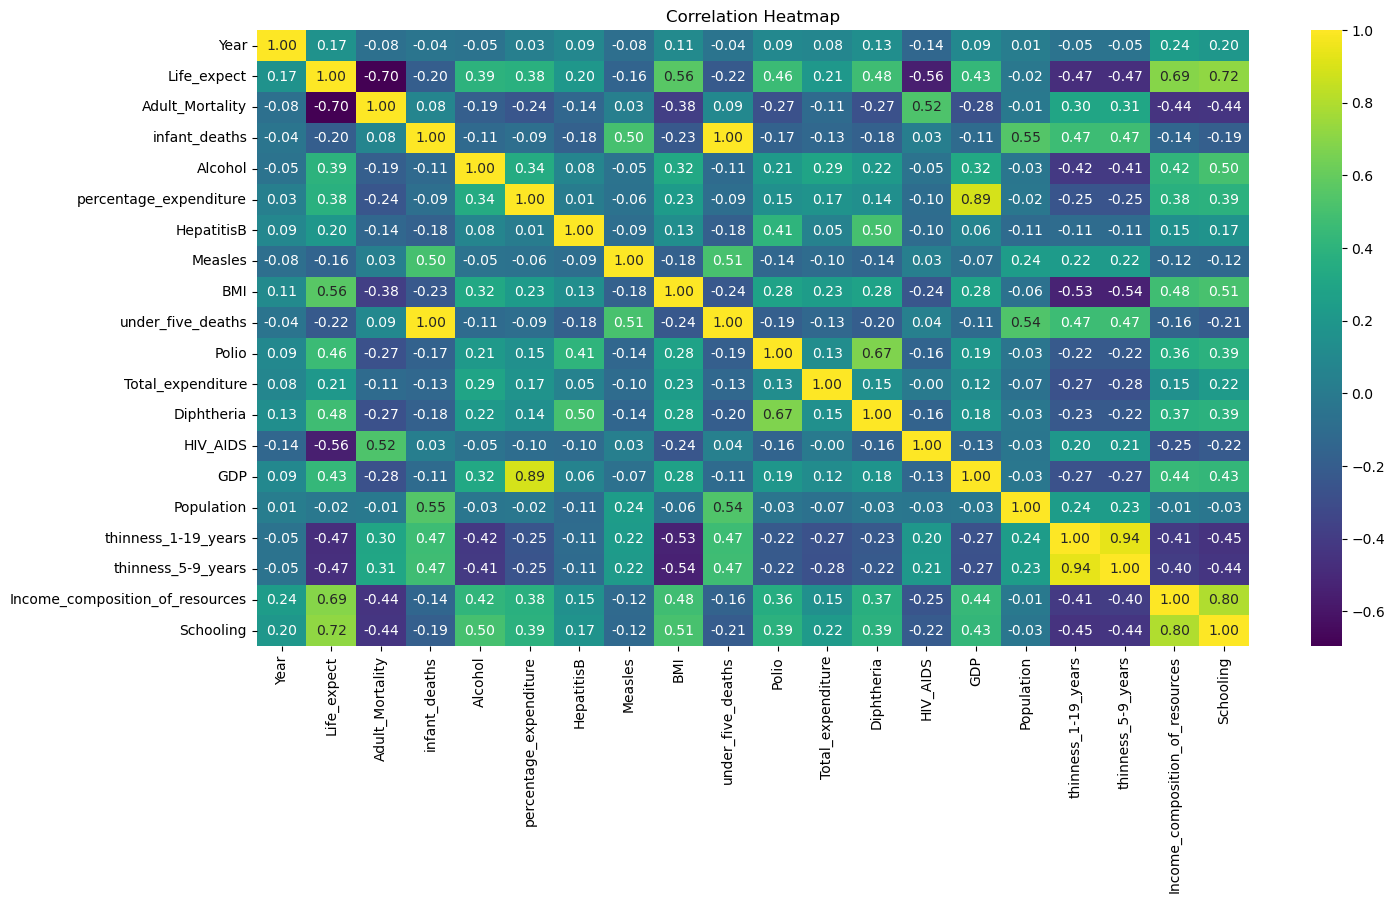

In [19]:
# Select only numeric columns for correlation calculation
numeric_ds = ds.select_dtypes(include=[np.number])  # Exclude non-numeric columns

# Compute the correlation matrix
correlation = numeric_ds.corr()

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

### 6. Analyzing Key Variables

**Life Expectancy by Status**

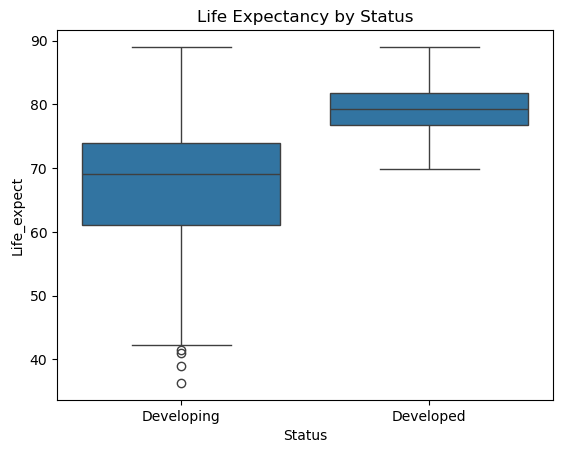

In [22]:
sns.boxplot(data=ds, x='Status', y='Life_expect')
plt.title('Life Expectancy by Status')
plt.show()

### 7. Feature Engineering

**Creating a new column for GDP per capita**

In [25]:
ds['GDP_per_capita'] = ds['GDP'] / ds['Population']

**Showcase the top and the bottom 10 GDP by country** 

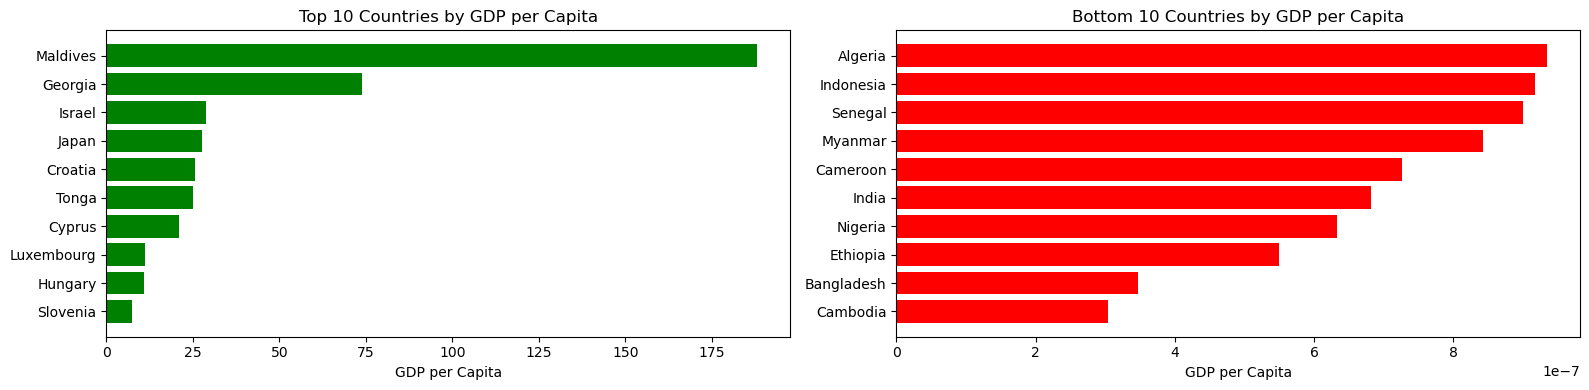

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure no division errors
ds['GDP_per_capita'] = ds['GDP'] / ds['Population']
ds['GDP_per_capita'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN in GDP_per_capita
valid_ds = ds.dropna(subset=['GDP_per_capita'])

# Sort by GDP_per_capita
sorted_ds = valid_ds.sort_values(by='GDP_per_capita', ascending=False)

# Ensure exactly 10 entries for top and bottom
top_10 = sorted_ds.head(23)
bottom_10 = sorted_ds.tail(15)

# If fewer than 10, pad with NaN or placeholder values
if len(top_10) < 10:
    top_10 = pd.concat([top_10, pd.DataFrame({
        'Country': ['Missing'] * (10 - len(top_10)),
        'GDP_per_capita': [0] * (10 - len(top_10))
    })])

if len(bottom_10) < 10:
    bottom_10 = pd.concat([bottom_10, pd.DataFrame({
        'Country': ['Missing'] * (10 - len(bottom_10)),
        'GDP_per_capita': [0] * (10 - len(bottom_10))
    })])

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Add the label at the end of the bar


# Plot the top 10
axes[0].barh(top_10['Country'], top_10['GDP_per_capita'], color='green')
axes[0].set_title('Top 10 Countries by GDP per Capita')
axes[0].set_xlabel('GDP per Capita')
axes[0].invert_yaxis()

# Plot the bottom 10
axes[1].barh(bottom_10['Country'], bottom_10['GDP_per_capita'], color='red')
axes[1].set_title('Bottom 10 Countries by GDP per Capita')
axes[1].set_xlabel('GDP per Capita')
axes[1].invert_yaxis()

# Adjust layout
plt.tight_layout()
plt.show()

### 8. Model Preparation

**Selecting features and target variable**

In [30]:
features = ['Year', 'Adult_Mortality', 'infant_deaths', 'Alcohol',
            'percentage_expenditure', 'HepatitisB', 'BMI',
            'under_five_deaths', 'Polio', 'Total_expenditure',
            'Diphtheria', 'HIV_AIDS', 'GDP', 'thinness_1-19_years',
            'thinness_5-9_years', 'Income_composition_of_resources',
            'Schooling']

target = 'Life_expect'

X = ds[features]
y = ds[target]

### 9. Splitting Data into Training and Testing Sets

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 10. Model Training

In [34]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 11. Model Evaluation

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.692188891821614
R-squared: 0.9689250269875773


### 12. Visualizing Model Predictions

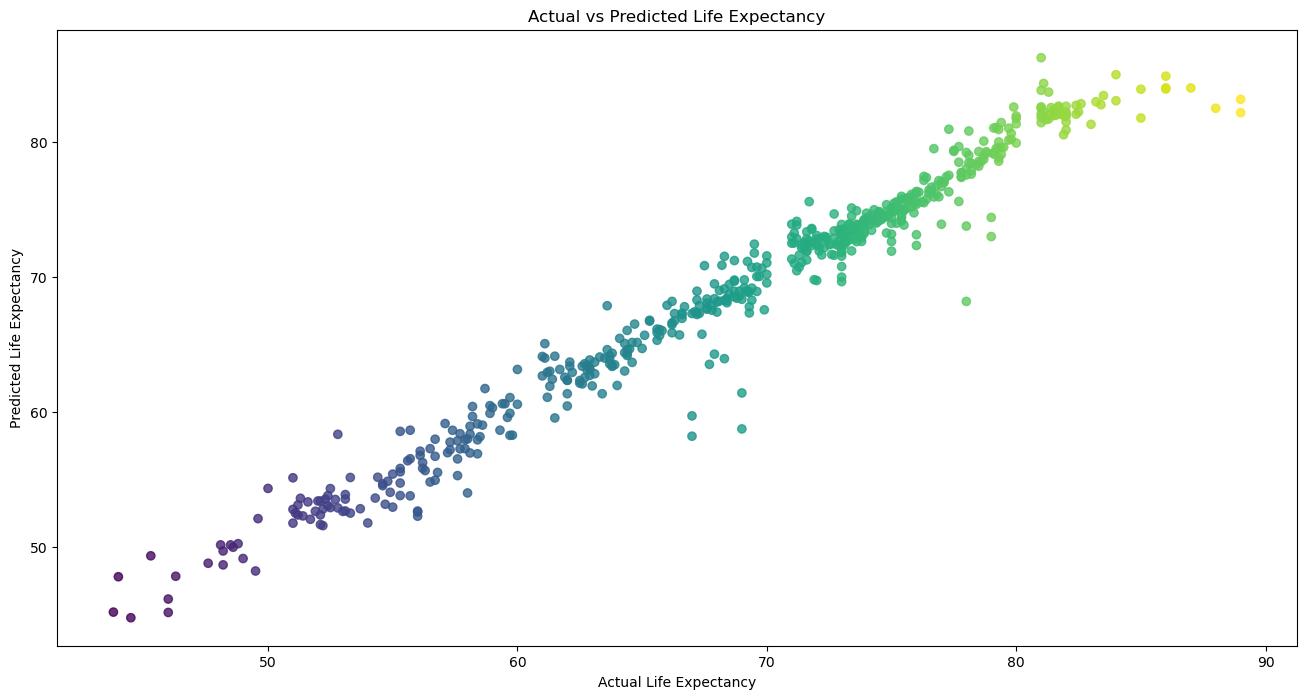

In [38]:
plt.figure(figsize=(16, 8))
plt.scatter(y_test, y_pred, c=y_test, cmap='viridis', alpha=0.8)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.show()